In [2]:
from PIL import Image, ImageEnhance, ImageOps
import os, zipfile
from IPython.display import display, FileLink
import matplotlib.pyplot as plt


input_path = "D:\CNN_H.A\Split_ECG\ECG Images of Myocardial Infarction Patients\MI(1)_lead_1.jpg" #change korbi


output_dir = "name of the folder where all your augmented images will be saved" # change korbi
os.makedirs(output_dir, exist_ok=True)

Original image size: (490, 200) mode: RGB


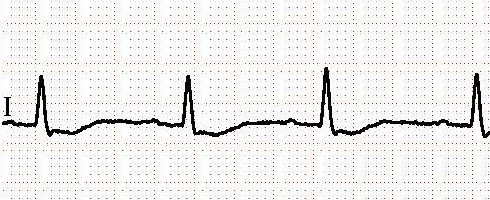

In [ ]:
img = Image.open(input_path).convert("RGB")   # convert to RGB to avoid mode surprises
print("Original image size:", img.size, "mode:", img.mode)
display(img) 

In [4]:
augmented = {
    "rotated_90": img.rotate(90, expand=True),
    "flipped_horizontal": ImageOps.mirror(img),
    "rotated_180": img.rotate(180, expand=True)
    
}

saved_files = []
for name, aug_img in augmented.items():
    filename = f"{name}.jpg"
    path = os.path.join(output_dir, filename)
    
    aug_img.save(path, format="JPEG", quality=95)
    saved_files.append(path)

print("Saved augmented files:")
for p in saved_files:
    print(" -", p)

Saved augmented files:
 - name of the folder where all your augmented images will be saved\rotated_90.jpg
 - name of the folder where all your augmented images will be saved\flipped_horizontal.jpg
 - name of the folder where all your augmented images will be saved\rotated_180.jpg


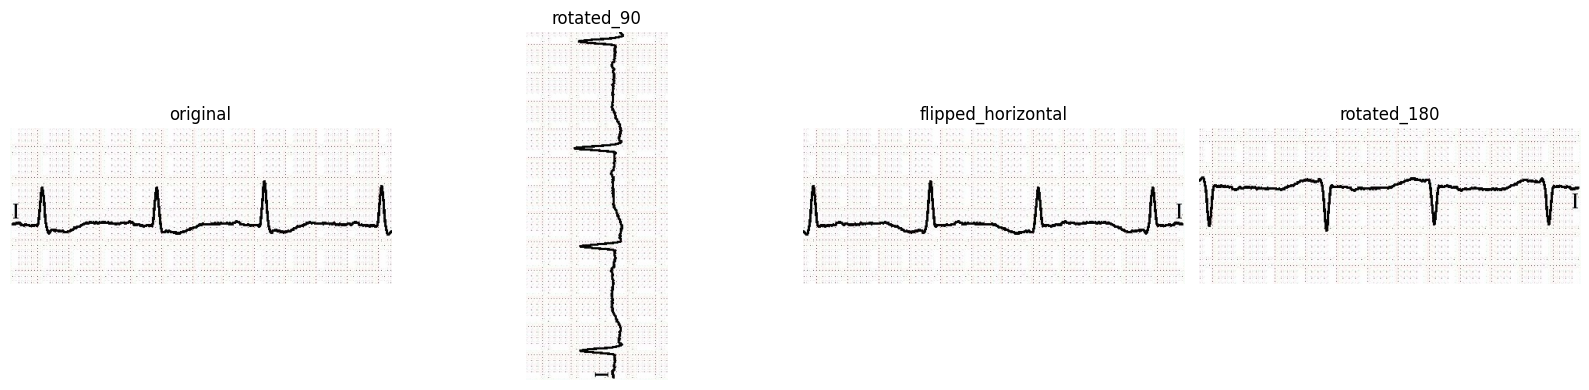

In [5]:
all_images = [("original", img)] + list(augmented.items())

cols = len(all_images)
plt.figure(figsize=(4*cols, 4))
for i, (title, im) in enumerate(all_images, start=1):
    plt.subplot(1, cols, i)
    plt.imshow(im)
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
zip_path = "augmented_images.zip"
with zipfile.ZipFile(zip_path, "w") as zf:
    for file in saved_files:
        zf.write(file, os.path.basename(file))

print("Created zip:", zip_path)
# akhne file ta zip hobe , atai final output 1ta image thake 4te ,folder output folder ta desktop a save korbi easy hobay to send.
display(FileLink(zip_path))

Created zip: augmented_images.zip


d:\CNN_H.A\augmented_images.zip